In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#input data
df = pd.read_csv("D://portofolio/cars.csv", sep=";")
print('numbers of row and collumns:',df.shape)
X = df[['Weight', 'Volume']]
y = df['CO2']

numbers of row and collumns: (36, 5)


Intercept: 
 79.69471929115937
Coefficients: 
 [0.00755095 0.00780526]
predict: [ 93.46522516  97.82012716  94.51480683  93.25102045 100.01068547
  94.51480683  98.99608035 101.70964861  99.79925895 100.8667207
  95.6804309   97.31699187  95.89663018 101.63691732 102.19568742
 102.22589121 102.49017436 106.53149836 100.63264133 105.33289232
 104.14383181 106.08798705 106.39280312 102.86772172 105.98982473
 102.46474333 106.55614578 108.33061839 103.68322403 108.17959944
 108.20503047 108.48918828 101.50855121 102.67894804 102.79221225
 109.74143455]


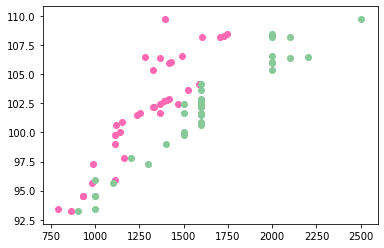

In [9]:
#multiple regression
regr = LinearRegression()
regr.fit(X, y)
predictedCO2 = regr.predict([[2300, 1300]])
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
ypred = regr.predict(X)
print("predict:", ypred)
#Scatter plot from 2 variable x and 1 variable y
x1 = df['Weight']
plt.scatter(x1, ypred, color = 'hotpink')
x2 = df['Volume']
plt.scatter(x2, ypred, color = '#88c999')
plt.show()

In [10]:
#accuracy size
# mean squared error
mse = np.sum((ypred - y)**2)
# root mean squared error
# m is the number of training examples
m = 5
rmse = np.sqrt(mse/m)
print("rmse:",rmse)

rmse: 15.572928277226838


In [11]:
#regression like R software result
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('CO2 ~ Weight+Volume', data=df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           0.000411
Time:                        21:02:27   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6947      5.564     14.322      0.0

In [12]:

#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
multicol = calc_vif(X ) 
print('VIF: \n', multicol)

VIF: 
   variables        VIF
0    Weight  43.094659
1    Volume  43.094659


In [13]:
#homogeneity test
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 2.1148726118938113),
 ('p-value', 0.34734515654936315),
 ('f-value', 1.0298145760696267),
 ('f p-value', 0.3682639960520279)]

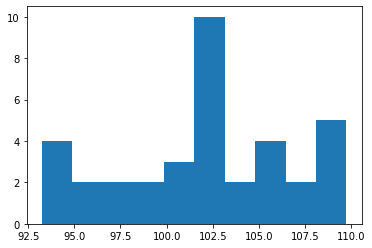

0     -5.534775
1      2.820127
2     -0.485193
3      3.251020
4     -4.989315
5    -10.485193
6      8.996080
7      9.709649
8      1.799259
9      1.866721
10    -3.319569
11    -3.683008
12    -3.103370
13     7.636917
14     5.195687
15     5.225891
16     3.490174
17     2.531498
18    -3.367359
19     0.332892
20    10.143832
21     7.087987
22     7.392803
23     3.867722
24     6.989825
25     0.464743
26     2.556146
27    -5.669382
28    -5.316776
29    -5.820401
30    -6.794970
31    -8.510812
32    -2.491449
33    -5.321052
34    -6.207788
35   -10.258565
Name: CO2, dtype: float64
Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [15]:
#normality test
#using histogram
# histogram plot
plt.hist(ypred)
plt.show()
#
residual = ypred - y
print(residual)

# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')